# Overview
In this programming assignment, I mainly design my methods based on the equation $w^* =(A^\intercal A+\lambda I)^{-1}A^\intercal b$. Here $A$ is our feature matrix X, and $b$ is our label y. So, after shuffling the dataset, I used k-fold cross validation to get 5 valid folds, and used the rest folds as training set. Then in function 'train', I implemented this formula to gain predicted labels of input data. Then I compared the predicted label with original labels to calculate rmses. The calculate mean rmse of 5 folds to gain the average as rmse of my model. Changing lambda could get different rmses.

In [207]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [208]:
# reading data
df = pd.read_csv("Housing.csv")
df = df.values
X = df[:, 0: -1]
y = df[:, -1]
y = y.reshape([-1,1])

# insert X0 to the first column of X
X0 = np.ones((X.shape[0], 1))
X = np.concatenate((X0, X), axis = 1)

In [209]:
# input - training data X, labels y,
# output - X_shuffled, y_shuffled
def cross_validation(X, y):
    X_shuffled = {}
    y_shuffled = {}
    num = len(y)
    index = np.arange(num)
    # shuffle the data
    np.random.shuffle(index)
    for i in range(5):
        X_shuffled[i] = X[index[i*num//5:(i+1)*num//5],:]
        y_shuffled[i] = y[index[i*num//5:(i+1)*num//5],:]
    return X_shuffled, y_shuffled

In [210]:
# merge the rest folds into one matrix to work as training set
def merge_dict(itr, mydict):
    a = np.ones((1,mydict[itr].shape[1]))
    for i in range(5):
        if i != itr:
            a = np.concatenate((a, mydict[i]), axis=0)
    a = np.delete(a, 0, axis=0)
    return a

In [211]:
def get_next_train_valid(X_shuffled, y_shuffled, itr):
    X_valid = X_shuffled[itr]
    y_valid = y_shuffled[itr]
    X_train = merge_dict(itr, X_shuffled)
    y_train = merge_dict(itr, y_shuffled)
    return X_train, y_train, X_valid, y_valid

In [212]:
def train(X_train, y_train, lamda):
    I = np.identity(X_train.shape[1])
    temp1 = np.dot(X_train.T, X_train) + lamda * I
    temp2 = np.dot(X_train.T, y_train)
    temp = np.dot(np.linalg.inv(temp1), temp2)
    model_weights = temp[1:temp.shape[0],:]
    model_intercept = temp[0, 0]
    return model_weights, model_intercept

In [213]:
def predict(X_valid, model_weights, model_intercept):
    w = np.concatenate((model_intercept.reshape(1,1), model_weights), axis = 0)
    y_predict = np.dot(X_valid, w)
    return y_predict

In [224]:
def main():
    X_shuffled, y_shuffled = cross_validation(X, y)
    rmse_valid = []
    rmse_train = []
    for lamda in range(101):
        squared_error_valid = []
        squared_error_train = []
        temp1 = []
        temp2 = []
        
        for itr in range(5):
            X_train, y_train, X_valid, y_valid = get_next_train_valid(X_shuffled, y_shuffled, itr)
            model_weights, model_intercept= train(X_train, y_train, lamda)
            y_predict_valid = predict(X_valid, model_weights, model_intercept)
            y_predict_train = predict(X_train, model_weights, model_intercept)
            error_valid = y_predict_valid - y_valid
            error_train = y_predict_train - y_train
            
            for val in error_valid:
                squared_error_valid.append(val * val)
            temp1.append(math.sqrt(sum(squared_error_valid)/len(squared_error_valid)))
            
            for val in error_train:
                squared_error_train.append(val * val)
            temp2.append(math.sqrt(sum(squared_error_train)/len(squared_error_train)))
        
        rmse_valid.append(np.mean(temp1))
        rmse_train.append(np.mean(temp2))       
        print("lmabda = %d, rmse of training set is: %f, rmse of valid set is: %f" %(lamda, np.mean(temp2), np.mean(temp1)))
    
    # plot
    plt.plot(rmse_valid, label = 'valid set')
    plt.plot(rmse_train, label = 'training set')
    plt.xlabel("lambda")
    plt.ylabel("mean rmse")
    plt.legend()
    plt.show()

lmabda = 0, rmse of training set is: 4.633431, rmse of valid set is: 4.871308
lmabda = 1, rmse of training set is: 4.730407, rmse of valid set is: 4.959530
lmabda = 2, rmse of training set is: 4.776852, rmse of valid set is: 5.004253
lmabda = 3, rmse of training set is: 4.800275, rmse of valid set is: 5.027179
lmabda = 4, rmse of training set is: 4.814476, rmse of valid set is: 5.041301
lmabda = 5, rmse of training set is: 4.824145, rmse of valid set is: 5.051076
lmabda = 6, rmse of training set is: 4.831274, rmse of valid set is: 5.058405
lmabda = 7, rmse of training set is: 4.836850, rmse of valid set is: 5.064232
lmabda = 8, rmse of training set is: 4.841414, rmse of valid set is: 5.069075
lmabda = 9, rmse of training set is: 4.845288, rmse of valid set is: 5.073243
lmabda = 10, rmse of training set is: 4.848674, rmse of valid set is: 5.076931
lmabda = 11, rmse of training set is: 4.851707, rmse of valid set is: 5.080269
lmabda = 12, rmse of training set is: 4.854478, rmse of valid 

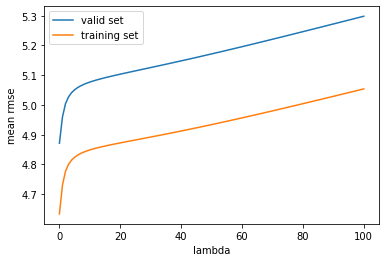

In [226]:
main()
